<a href="https://colab.research.google.com/github/Sujit27/dummy/blob/main/EDA_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook explores the input data, does preprocessing and feature selection##

In [25]:
import pandas as pd
import sklearn
import numpy
import matplotlib.pyplot as plt
import os

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!ls drive/MyDrive/arya.ai-assignment/Arya_DataScientist_Assignment

test_set.csv  training_set.csv


### Load training data and explore ###

In [28]:
df = pd.read_csv("drive/MyDrive/arya.ai-assignment/Arya_DataScientist_Assignment/training_set.csv")

In [29]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [30]:
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [31]:
df_x = df.iloc[:,1:-1]

In [32]:
df_x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207


In [33]:
df_x.values.shape

(3910, 57)

In [34]:
# numpy.savetxt("drive/MyDrive/arya.ai-assignment/x_raw.csv", df_x.values, delimiter=",")

### Normalize the data ###

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()
scaler.fit(df_x.values)
x_normalized = scaler.transform(df_x.values)

In [37]:
x_normalized

array([[0.00000000e+00, 0.00000000e+00, 9.55947137e-01, ...,
        1.81570586e-04, 1.00120144e-04, 1.09333068e-03],
       [0.00000000e+00, 3.92156863e-02, 1.23348018e-01, ...,
        1.38937812e-02, 1.47176612e-02, 3.71732432e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.97574794e-04],
       ...,
       [2.76497696e-02, 0.00000000e+00, 2.64317181e-02, ...,
        2.24239673e-04, 4.00480577e-04, 1.29211808e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.59373581e-03, 2.40288346e-03, 7.95149588e-03],
       [2.21198157e-01, 0.00000000e+00, 1.05726872e-01, ...,
        7.77122106e-03, 2.58309972e-02, 7.11658881e-02]])

(array([3.572e+03, 2.270e+02, 7.600e+01, 1.300e+01, 1.000e+01, 5.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

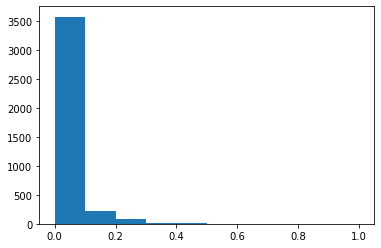

In [38]:
plt.hist(x_normalized[:,0])

In [39]:
# numpy.savetxt("drive/MyDrive/arya.ai-assignment/x_normalized.csv", x_normalized, delimiter=",")

### Standardize the data ###

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaler.fit(df_x.values)
x_standardized = scaler.transform(df_x.values)

In [42]:
x_standardized

array([[-0.34760455, -0.16465242,  8.04219672, ..., -0.12254795,
        -0.24624956, -0.46874471],
       [-0.34760455,  0.28203688,  0.54647493, ...,  0.35857811,
         0.46796951,  0.15899419],
       [-0.34760455, -0.16465242, -0.56400237, ..., -0.12891879,
        -0.25114147, -0.48084987],
       ...,
       [ 0.05741185, -0.16465242, -0.32604295, ..., -0.1210508 ,
        -0.23157383, -0.26295702],
       [-0.34760455, -0.16465242, -0.56400237, ..., -0.0379113 ,
        -0.1337356 , -0.34942244],
       [ 2.89252664, -0.16465242,  0.38783531, ...,  0.14375329,
         1.01097168,  0.75041762]])

(array([3.575e+03, 2.100e+02, 6.500e+01, 2.100e+01, 1.600e+01, 1.100e+01,
        2.000e+00, 9.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.29955918,  0.98620436,  2.2719679 ,  3.55773143,  4.84349497,
         6.12925851,  7.41502204,  8.70078558,  9.98654912, 11.27231266,
        12.55807619]),
 <a list of 10 Patch objects>)

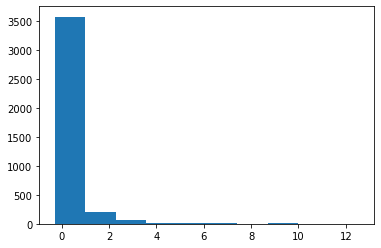

In [43]:
plt.hist(x_standardized[:,10])

In [44]:
# numpy.savetxt("drive/MyDrive/arya.ai-assignment/x_standardized.csv", x_standardized, delimiter=",")

In [45]:
df.Y.values

array([0, 1, 0, ..., 0, 1, 1])

In [46]:
# numpy.savetxt("drive/MyDrive/arya.ai-assignment/y_raw.csv", df.Y.values, delimiter=",")

### Select features based on chi square scores ###

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
feature_selector = SelectKBest(chi2, k=20)
X_selected = feature_selector.fit_transform(df_x.values, df.Y.values)

In [52]:
feature_selector.scores_

array([5.61543396e+01, 2.08682667e+01, 1.46870471e+02, 3.65151653e+02,
       3.17691556e+02, 1.79079929e+02, 5.65424535e+02, 2.76770266e+02,
       2.04307961e+02, 1.36049174e+02, 1.62486071e+02, 3.63467053e-01,
       6.01983060e+01, 3.99895777e+01, 1.97062577e+02, 7.10305054e+02,
       3.91384341e+02, 2.49799938e+02, 5.87874592e+02, 4.26423868e+02,
       1.08095519e+03, 2.68586752e+02, 5.30050513e+02, 3.91796244e+02,
       1.34321601e+03, 6.26389608e+02, 1.90202607e+03, 2.26165038e+02,
       2.49507458e+02, 2.32378241e+02, 1.58738492e+02, 1.14468691e+02,
       1.64716572e+02, 1.10293205e+02, 2.39349805e+02, 1.22064187e+02,
       1.60433272e+02, 1.20593869e+01, 1.49197405e+02, 2.87856581e+01,
       1.13494049e+02, 3.38726296e+02, 8.67893751e+01, 1.75151324e+02,
       2.89820883e+02, 4.01648458e+02, 9.20277563e+00, 7.50521280e+01,
       2.05272447e+01, 1.49580332e+01, 1.12000816e+01, 5.38716701e+02,
       3.34177788e+02, 5.91953275e+01, 8.39155233e+03, 1.34374683e+05,
      

In [53]:
# numpy.savetxt("drive/MyDrive/arya.ai-assignment/x_selected.csv", X_selected, delimiter=",")

### Do dimensionality reduction on the data ###

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components=10)
pca.fit(df_x.values)
print(pca.explained_variance_ratio_)

[9.19361512e-01 7.85565839e-02 1.98917706e-03 2.94111821e-05
 1.11890077e-05 7.02082629e-06 4.96802917e-06 4.11048052e-06
 3.66468938e-06 2.87480977e-06]


In [56]:
pca = PCA(n_components=3)
pca.fit(df_x.values)
print(pca.explained_variance_ratio_)

[0.91936151 0.07855658 0.00198918]


In [57]:
pca_x = pca.transform(df_x.values)

In [59]:
pca_x.shape

(3910, 3)

In [60]:
# numpy.savetxt("drive/MyDrive/arya.ai-assignment/x_pca.csv", pca_x, delimiter=",")